In [1]:
github_username = "lanvu301"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/lanvu301/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/lanvu301/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Comparative Experiments


# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 3, 2025**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experience is to compare the effectiveness of three different teaching methods on graduate students understanding of hypothesis testing

**Question 2.** Specify the outcome variable

The student quiz score

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

Independent variable is "teaching_method" and the block factor is "prior_knowledge"

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

A randomized block design is appropriate because students differ in their prior knowledge which can contribute to their quiz score. Students can have different starting from within the same teaching methods groups

**Question 5.** State the null and alternative hypotheses for this experiment.

$$ H_0: \mu_{\text{1}} = \mu_{\text{2}} = μ_{\text{3}} $$

$$ H_1:  At  least 1 \mu_{\text{i}} is different $$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload dataset
file_path = "/content/STAT-7220-Applied-Experimental-Design/Assignments/HW2/Data Science Teaching Method.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Summary statistics grouped by Teaching Method and Prior Knowledge
summary_stats = df.groupby(['Teaching_Method', 'Prior_Knowledge'])['Score'].describe().round(2)

summary_stats




count   mean   std    min    25%    50%  \
Teaching_Method Prior_Knowledge                                            
Collaborative   High              10.0  90.93  7.97  76.62  88.31  91.16   
                Low               10.0  82.18  8.17  69.97  74.96  82.45   
Direct          High              10.0  77.00  6.13  69.25  73.46  75.93   
                Low               10.0  73.66  6.62  59.89  74.15  75.73   
Inquiry         High              10.0  88.62  5.32  79.77  85.10  88.39   
                Low               10.0  81.90  5.98  72.05  77.84  80.76   

                                   75%     max  
Teaching_Method Prior_Knowledge                 
Collaborative   High             91.88  105.06  
                Low              89.66   91.86  
Direct          High             80.78   88.61  
                Low              76.74   80.20  
Inquiry         High             92.32   98.18  
                Low              86.63   91.10

We have students with high prior knowledge have higher score.


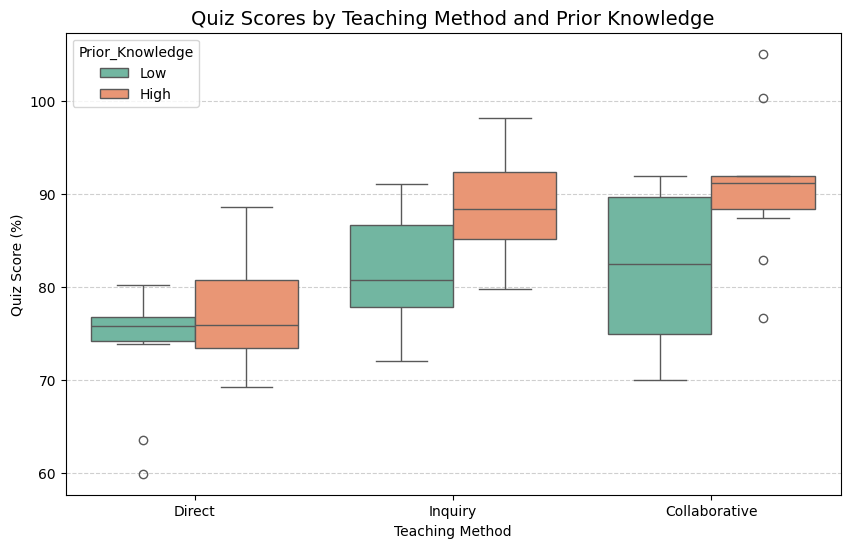

In [6]:
# Visualization: Boxplot of scores by teaching method and prior knowledge
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Teaching_Method', y='Score', hue='Prior_Knowledge', palette='Set2')
plt.title("Quiz Scores by Teaching Method and Prior Knowledge", fontsize=14)
plt.ylabel("Quiz Score (%)")
plt.xlabel("Teaching Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

From the boxplot, we can tell that collaborative and inquiry teaching method generally perform better and direct.
Based on the both summary statistics and the boxplot visualization, the evidence appearrs to suopport the alternative hypothesis.
Students in the Collaborative Learning and Inquiry-based learning workshops achieved higher mean quiz scores compared to those in the Direct instruction group.
This analysis suggest that teaching method does have an effect on students study outcome


**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


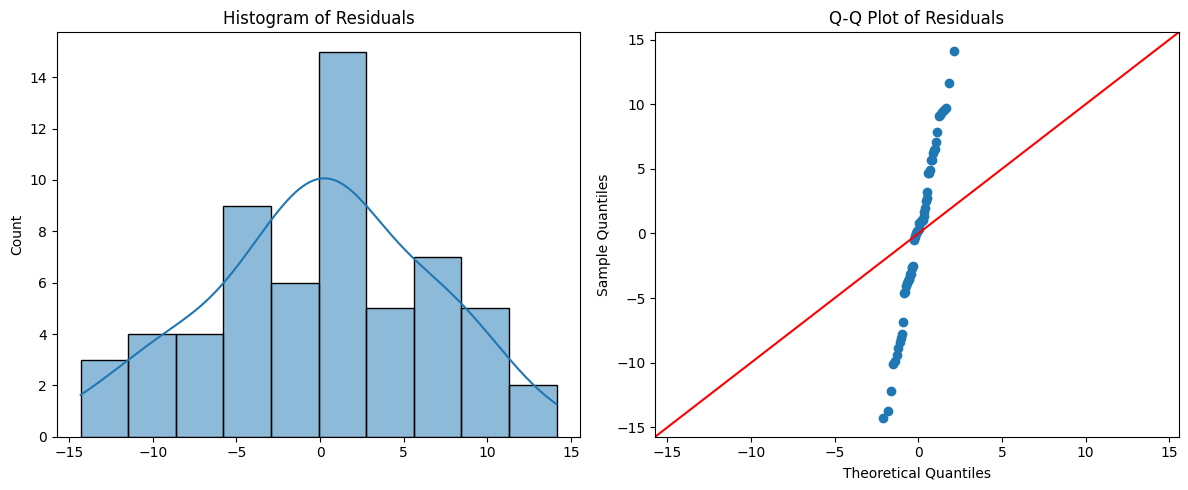

(                                            sum_sq    df          F    PR(>F)
 C(Teaching_Method)                     1508.792653   2.0  16.415063  0.000003
 C(Prior_Knowledge)                      589.756202   1.0  12.832625  0.000731
 C(Teaching_Method):C(Prior_Knowledge)    74.747613   2.0   0.813224  0.448782
 Residual                               2481.708550  54.0        NaN       NaN,
 ShapiroResult(statistic=np.float64(0.984313332289175), pvalue=np.float64(0.6343906841745357)))

In [10]:
# Reimport and re-run analysis after environment reset
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Two-way ANOVA model
model = ols('Score ~ C(Teaching_Method) * C(Prior_Knowledge)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Residuals
residuals = model.resid

# Shapiro-Wilk normality test
shapiro_test = shapiro(residuals)

# Visual normality check
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(residuals, bins=10, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")

# Q-Q plot
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

anova_table, shapiro_test



**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

**Question 2.** Specify the outcome variable

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations of this experiment.